# 

2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.

You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. Here is a link to a cheat sheet showing the basics of styling text using Markdown.

3. In the first cell of your notebook, import the required packages with their customary aliases as follows:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Keep all imports in this cell at the top of your notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [2]:
gdp_df = pd.read_csv("../data/UNdata_Export_20251011_175347475.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.drop(columns=["Value Footnotes"])

In [6]:
gdp_df.rename(columns={
    'Country or Area': 'country',
    'Year': 'year',
    'Value': 'GDP_Per_Capita'
})

#renamed columns after removing footnotes

,country,year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [8]:
gdp_df['Year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       1990])

In [9]:
gdp_df['Year'].nunique()

34

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [10]:
gdp_df['Country or Area'].nunique()

247

In [11]:
gdp_df['Country or Area'].value_counts()

Country or Area
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [12]:
gdp_2021 = gdp_df[gdp_df['Year'] == 2021]
gdp_2021.head()

,Country or Area,Year,Value
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
60,Africa Western and Central,2021,4698.926894
94,Albania,2021,16113.136519
128,Algeria,2021,14496.865470


10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [13]:
gdp_2021.describe()

,Year,Value
count,247.0,247.000000
mean,2021.0,24478.517262
std,0.0,24601.525764
min,2021.0,836.665571
25%,2021.0,5996.532844
50%,2021.0,15900.976581
75%,2021.0,37298.776853
max,2021.0,135379.291201


11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

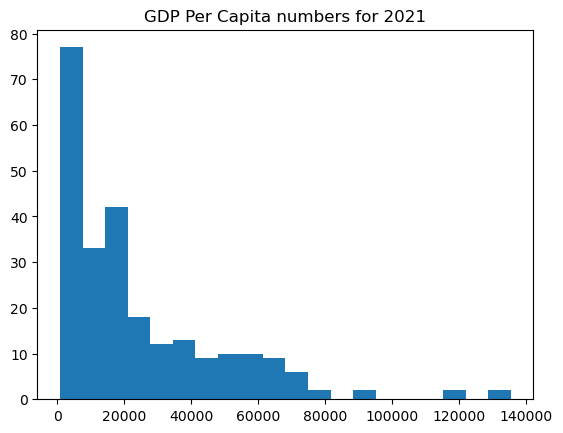

In [14]:
plt.hist(gdp_2021['Value'], bins=20 );
plt.title("GDP Per Capita numbers for 2021");

The shape has a tail to the right

12. Find the top 5 countries and bottom 5 countries by GDP per capita in 2021.

In [15]:
gdp_2021["Value"].sort_values()

1045       836.665571
1301      1128.552380
1733      1313.618218
6698      1392.464262
5132      1457.235409
            ...      
740      92276.234605
6118    116832.570290
3492    118594.746862
6513    131864.092336
4425    135379.291201
Name: Value, Length: 247, dtype: float64

13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [16]:
# Correct way to filter for multiple conditions using OR in pandas
gdp_df_filter = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2021)]

# Note: The parentheses around each condition are important to ensure
# the OR operation is applied to the boolean masks, not to the resulting DataFrames

In [17]:
gdp_pivoted = gdp_df_filter.pivot_table(
     index='Country or Area',      # Rows
     columns='Year',               # Columns
     values='Value',               # Values to aggregate
     aggfunc='mean',               # Aggregation function
                      
 ).dropna()

14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [18]:
gdp_pivoted

Year,1990,2021
Country or Area,,
Africa Eastern and Southern,3386.854480,3934.287267
Africa Western and Central,3299.401375,4698.926894
Albania,5327.747458,16113.136519
Algeria,11728.545729,14496.865470
Andorra,50036.300776,59332.202910
...,...,...
Vanuatu,3101.680551,3135.836649
Viet Nam,2467.964601,12048.901994
World,11207.386344,19637.823230


In [19]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2021] - gdp_pivoted[1990])/gdp_pivoted[1990]

In [20]:
gdp_pivoted

Year,1990,2021,Percent_Change
Country or Area,,,
Africa Eastern and Southern,3386.854480,3934.287267,16.163458
Africa Western and Central,3299.401375,4698.926894,42.417559
Albania,5327.747458,16113.136519,202.438069
Algeria,11728.545729,14496.865470,23.603265
Andorra,50036.300776,59332.202910,18.578316
...,...,...,...
Vanuatu,3101.680551,3135.836649,1.101213
Viet Nam,2467.964601,12048.901994,388.212108
World,11207.386344,19637.823230,75.222149


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [21]:
n_countries= gdp_pivoted[gdp_pivoted['Percent_Change'] <0]['Percent_Change'].count()
n_countries

np.int64(23)

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2021. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
highest_gdp_percentage = gdp_pivoted['Percent_Change'].idxmax()
highest_gdp_percentage

'Equatorial Guinea'

In [48]:
plt.plot(gdp_pivoted['Equatorial Guinea'])
plt.show

KeyError: 'Equatorial Guinea'

17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

19. Determine the number of countries per continent. Create a bar chart showing this.

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

23. What was the first country with a life expectancy to exceed 80?

24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

29. Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

Bonus: Solo Exploration:

1. Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find.
2. If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/.

1. Download the Gross Domestic Product (GDP) per capita dataset from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.